# **Modelos de regresión**

En este trabajo se presentan diversos modelos de regresión con el objetivo de predecir la velocidad del viento utilizando datos históricos. La predicción de variables continuas, como en este caso la velocidad del viento, es un desafío clave en muchos ámbitos, desde la meteorología hasta la energía renovable. Para abordar este problema, se han implementado y evaluado varios enfoques de aprendizaje automático.

## **Librerías y modulos necesarios**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

## **Datos**

Inicialmente importamos el conjunto de datos que utilizaremos para el desarrollo de los modelos.

In [2]:
file_path = r'C:\Users\kamac\OneDrive\Desktop\MachineLearningUN\EDA\ws_modelos.xlsx'
data = pd.read_excel(file_path)

### **Características principales de la base de datos**

Aquí podemos ver las primeras cinco filas de nuestro dataset, que será utilizado para la construcción de los modelos de regresión lineal.

In [3]:
data.head()

Fecha  VelViento100m_1  VelViento100m_2  VelViento80m_1  \
0 2022-01-01 00:00:00        16.060860        15.830104       15.145418   
1 2022-01-01 00:10:00        16.156927        15.972642       15.290614   
2 2022-01-01 00:20:00        16.473571        16.287375       15.599149   
3 2022-01-01 00:30:00        16.660009        16.451707       15.801446   
4 2022-01-01 00:40:00        16.519613        16.353678       15.851963   

   VelViento80m_2  VelViento60m  DirViento60m  DirViento100m  DirViento80m  \
0       15.125038     14.300989         61.98          61.08         61.21   
1       15.352352     14.533556         62.29          61.08         61.49   
2       15.562022     14.808378         61.18          60.42         60.65   
3       15.779687     15.170287         62.20          60.88         61.19   
4       15.749131     14.927282         61.26          59.99         60.26   

       Presion    Humedad   Temp100m    Temp21m  
0  1005.963541  75.042725  26.922913  26.707773  
1  1005.795867  73.509216  27.006836  26.772633  
2  1005.739976  72.914124  26.991577  26.772633  
3  1005.684085  73.165894  26.877136  26.659982  
4  1005.609563  73.791504  26.770325  26.601949

In [4]:
data.shape

(19083, 13)

El conjunto de datos cuenta con **13** variables y **19083** observaciones.

In [5]:
data.describe(include = 'number')

VelViento100m_1  VelViento100m_2  VelViento80m_1  VelViento80m_2  \
count     19083.000000     19083.000000    19083.000000    19083.000000   
mean         12.312852        12.178773       11.935864       11.932547   
std           4.451743         4.403151        4.286567        4.276207   
min           0.532543         0.500556        0.500413        0.504115   
25%           9.794922         9.695314        9.577789        9.588132   
50%          12.941995        12.808712       12.555704       12.558730   
75%          15.559608        15.380787       15.031122       15.017974   
max          22.301553        22.027242       21.730798       21.769775   

       VelViento60m  DirViento60m  DirViento100m  DirViento80m       Presion  \
count  19083.000000  19083.000000   19083.000000  19083.000000  19083.000000   
mean      11.607971     67.265740      65.990962     66.286775   1006.202742   
std        4.121395     48.492877      48.712525     48.584865      1.823561   
min        0.292860      0.230000       0.000000      0.030000   1001.417712   
25%        9.416717     48.860000      47.860000     47.910000   1004.901606   
50%       12.223383     56.480000      55.300000     55.580000   1006.112585   
75%       14.560523     64.440000      63.005000     63.390000   1007.435347   
max       21.140790    359.900000     359.950000    359.890000   1012.428307   

            Humedad      Temp100m       Temp21m  
count  19083.000000  19083.000000  19083.000000  
mean      84.492969     26.273377     26.493438  
std        4.303362      0.846383      0.951527  
min       63.072205     23.710938     22.700129  
25%       81.642151     25.709839     25.823634  
50%       84.640503     26.068420     26.328856  
75%       87.669373     26.587219     26.997935  
max       94.093323     33.903809     34.596755

A partir del análisis estadístico de las variables presentadas en el resumen descriptivo, se puede observar que no hay valores erróneos en los datos de velocidad del viento, presión atmosférica, humedad relativa, temperatura y dirección del viento. Esto se debe a que se han aplicado previamente criterios específicos de limpieza para garantizar la calidad de la base de datos. 

Para identificar y eliminar los datos erróneos, se emplearon las siguientes reglas: en la **velocidad del viento**, cualquier valor menor a 0.5 m/s que permanezca fijo en el tiempo se considera un error. Para la **presión atmosférica**, valores por debajo de 980 hPa se identifican como erróneos. En el caso de la **humedad relativa**, valores menores a 60% son inválidos, y para la **temperatura**, cualquier valor inferior a 20°C también es considerado un error, con la particularidad de que los errores en humedad y temperatura suelen coincidir en el tiempo. 

Por otro lado, la **dirección del viento** presenta desafíos adicionales en su evaluación, ya que es una variable circular en la que 360° equivale a 0°. Por lo tanto, valores altos no son necesariamente erróneos ni atípicos; en su lugar, los errores en esta variable se detectan cuando la serie permanece fija en un valor específico de manera prolongada. 

Con estos filtros aplicados, los valores descriptivos en el resumen indican que la base de datos está limpia y lista para desarrollar y aplicar modelos de regresión para cada una de las variables de velocidad del viento a diferentes alturas.

## **Modelos**
Ahora, veamos los modelos. Dado que nuestro objetivo es predecir la velocidad del viento, y encontramos varias variables objetivo (específicamente 5), que corresponden a las velocidades del viento medidas a diferentes alturas y con diferentes sensores, aplicaremos los 8 modelos de regresión seleccionados: Regresión K-NN, Regresión Ridge, Regresión Lasso, Regresión Lineal, Árboles de decisión para regresión, Random Forest, XGboost Y SVR  para cada una de las variables objetivo identificadas.

Para evaluar el desempeño de los modelos, utilizaremos varias métricas, entre ellas el Mean Absolute Percentage Error (MAPE), que nos permitirá medir el error porcentual promedio entre los valores predichos y los valores reales. Esto es especialmente útil cuando se trata de comparaciones de modelos de predicción, ya que el MAPE es intuitivo y fácil de interpretar.

El código para calcular el MAPE se presenta a continuación:

In [6]:
def MAPE(y_true, y_pred):
    # Convertimos las entradas a arrays de numpy para facilitar el cálculo vectorizado
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Evitar la división por cero, ignorando los valores donde y_true es 0
    # Creamos un filtro para seleccionar solo los índices donde y_true no sea igual a 0
    non_zero_indices = y_true != 0

    # Calculamos el MAPE solo para los valores donde y_true no es cero.
    # La fórmula del MAPE es el promedio del valor absoluto del error porcentual entre y_true y y_pred
    # Multiplicamos por 100 para convertirlo en porcentaje
    mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

    # Retornamos el valor del MAPE
    return mape

Este método garantiza que los valores donde el valor verdadero es cero no se incluyan en el cálculo, evitando errores de división por cero y proporcionando una evaluación más precisa del desempeño de los modelos. A continuación, aplicaremos esta métrica, junto con otras como el $RMSE$ y el $R^2$, para evaluar el desempeño de cada uno de los modelos en las distintas variables objetivo.

### **Método para evaluar los modelos usando ventanas de predicción**

A continuación, se presenta la función evaluar_modelos, que nos permite entrenar y evaluar varios modelos de regresión para predecir la velocidad del viento, utilizando ventanas temporales de distintos tamaños (7, 14, 21 y 28 días). La función implementa cuatro modelos principales: **Regresión K-NN**, **Regresión Lineal**, **Regresión Ridge** y **Regresión Lasso**. Cada uno de estos modelos se evalúa utilizando métricas clave como **RMSE, MAPE y $R^2$**, junto con pruebas estadísticas adicionales como el test de **Jarque-Bera** y **Ljung-Box** para evaluar la normalidad y autocorrelación de los residuos.

La evaluación se realiza en bloques de entrenamiento y prueba definidos por las ventanas de tiempo, lo que permite una estimación más robusta de su capacidad predictiva. A continuación, se presenta el código correspondiente para esta evaluación.

In [7]:
def evaluar_modelos(X, y, ventanas_tiempo=[7, 14, 21, 28]):
    modelos = {
        'Regresión K-NN': KNeighborsRegressor(),
        'Regresión Lineal': LinearRegression(),
        'Regresión Ridge': Ridge(),
        'Regresión Lasso': Lasso(alpha = 0.011),
        'Random Forest': RandomForestRegressor(random_state = 11),
        'XGboost': XGBRegressor(random_state = 11),
        #'SVR': SVR(kernel = 'rbf')
    }

    indices_modelos = {
        'Regresión K-NN': {'index': 0},
        'Regresión Lineal': {'index': 1},
        'Regresión Ridge': {'index': 2},
        'Regresión Lasso': {'index': 3},
        'Random Forest': {'index': 4},
        'XGboost': {'index': 5},
       # 'SVR': {'index': 6}
    }

    mejores = [None] * 6
    mayor_R2 = [0] * 6  
    resultados = []

    for ventana in ventanas_tiempo:
        inicio = 0

        while inicio + (ventana * 6 * 24) + (6 * 24) < len(X):
            fin = inicio + (ventana * 6 * 24)
            if fin > len(X) or fin + (6 * 24) > len(X):
                break

            X_train, y_train = X.iloc[inicio:fin], y.iloc[inicio:fin]
            X_test, y_test = X.iloc[fin:fin + (6 * 24)], y.iloc[fin:fin + (6 * 24)]

            # Iterar sobre cada modelo
            for nombre_modelo, modelo in modelos.items():
                idx = indices_modelos[nombre_modelo]['index']

                modelo.fit(X_train, y_train)
                y_pred, y_train_pred = modelo.predict(X_test), modelo.predict(X_train)

                residuals = y_test - y_pred
                RMSE = mean_squared_error(y_test, y_pred, squared=False)
                MAPE_value = MAPE(y_test, y_pred)
                R2 = r2_score(y_test, y_pred)

                jb_test_stat, jb_p_value = jarque_bera(residuals)
                lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
                ljung_box_p_value = lb_test['lb_pvalue'].values[0]

                # Actualizar si este modelo tiene menor RMSE
                if R2 > mayor_R2[idx]:
                    mejores[idx], mayor_R2[idx] = [y_train, y_train_pred, y_test, y_pred, nombre_modelo], R2

                # Almacenar los resultados para cada modelo
                resultados.append({
                    "Modelo": nombre_modelo,
                    "MAPE": MAPE_value,
                    "RMSE": RMSE,
                    "R^2": R2,
                    "Ljung-Box p-value": ljung_box_p_value,
                    "Jarque-Bera p-value": jb_p_value
                })

            inicio = fin

    # Convertir resultados a DataFrame
    resultados_df = pd.DataFrame(resultados)

    # Seleccionar los mejores modelos según R2
    mejores_modelos = resultados_df.loc[resultados_df.groupby('Modelo')['R^2'].idxmax()]

    return mejores_modelos, mejores


### **Método para realizar las gráficas**

In [8]:
def grafica(y_train, y_train_pred, y_test, y_test_pred, nombre_modelo):
    # Calcular R² y RMSE para el conjunto de entrenamiento
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    plt.figure(figsize=(14, 6))

    # Gráfico del conjunto de entrenamiento
    plt.subplot(1, 2, 1)
    plt.plot(range(len(y_train)), y_train, label='Velocidad original', color='#FF69B4', linestyle='-', marker='o')  # Rosa brillante
    plt.plot(range(len(y_train_pred)), y_train_pred, label='Velocidad predicha', color='#FF1493', linestyle='--', marker='x')  # Rosa oscuro
    plt.xlabel('Índice')
    plt.ylabel('Velocidad del viento')
    plt.title(f"{nombre_modelo} (Entrenamiento)\nR²: {r2_train:.5f}")
    plt.legend()
    plt.grid(True)

    # Gráfico del conjunto de prueba
    plt.subplot(1, 2, 2)
    plt.plot(range(len(y_test)), y_test, label='Velocidad original', color='#FFB6C1', linestyle='-', marker='o')  # Rosa claro
    plt.plot(range(len(y_test_pred)), y_test_pred, label='Velocidad predicha', color='#DB7093', linestyle='--', marker='x')  # Rosa medio
    plt.xlabel('Índice')
    plt.ylabel('Velocidad del viento')
    plt.title(f"{nombre_modelo} (Prueba)\nR²: {r2_test:.5f}")
    plt.legend()
    plt.grid(True)

    return plt

## **Modelo 1: Wind speed 100 metros (Sensor 1)**

In [9]:
X1 = data.drop(columns=['Fecha', 'VelViento100m_1', 'VelViento100m_2', 'VelViento80m_1', 'VelViento80m_2', 'VelViento60m', 'DirViento80m', 'DirViento60m'])
y1 = data['VelViento100m_1']

### **Modelos usando ventanas de predicción**

In [10]:
tabla, mejores = evaluar_modelos(X1, y1)
tabla

Modelo       MAPE      RMSE       R^2  Ljung-Box p-value  \
52     Random Forest  14.308942  1.802617  0.728470       4.393750e-65   
48    Regresión K-NN  17.234822  2.153089  0.612622       9.104624e-93   
39   Regresión Lasso   4.030323  0.851835  0.764118       3.836433e-67   
37  Regresión Lineal   4.013425  0.845024  0.767875       1.306806e-63   
38   Regresión Ridge   4.013893  0.846827  0.766883       7.620692e-65   
53           XGboost  14.851156  1.838088  0.717679       5.337349e-73   

    Jarque-Bera p-value  
52         9.903668e-09  
48         8.177224e-21  
39         2.194810e-01  
37         2.488181e-01  
38         2.410755e-01  
53         9.994743e-16

### **Gráficas de los modelos**

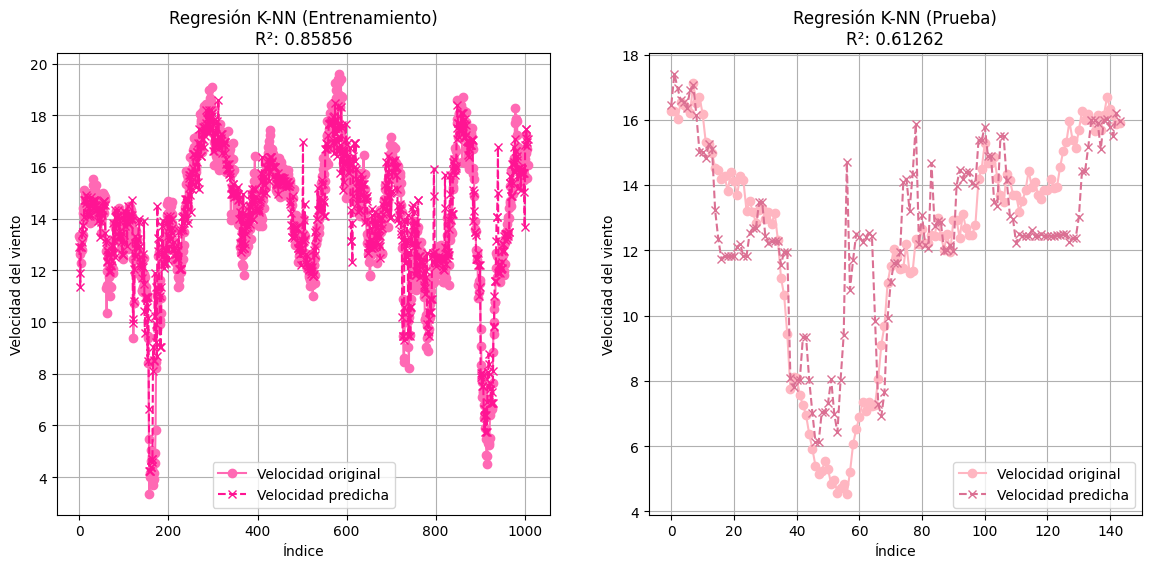

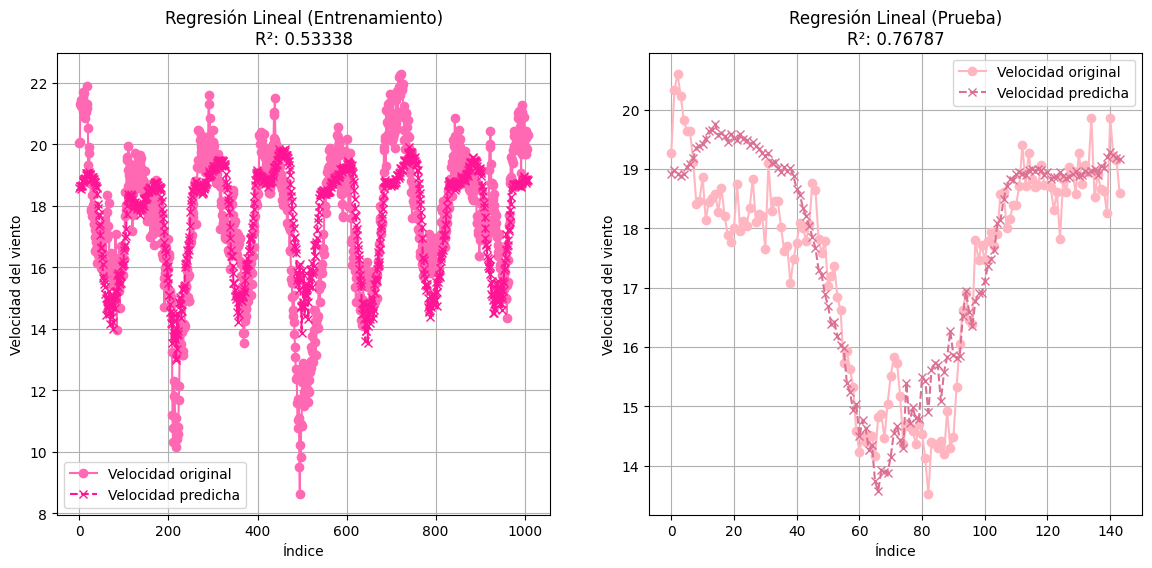

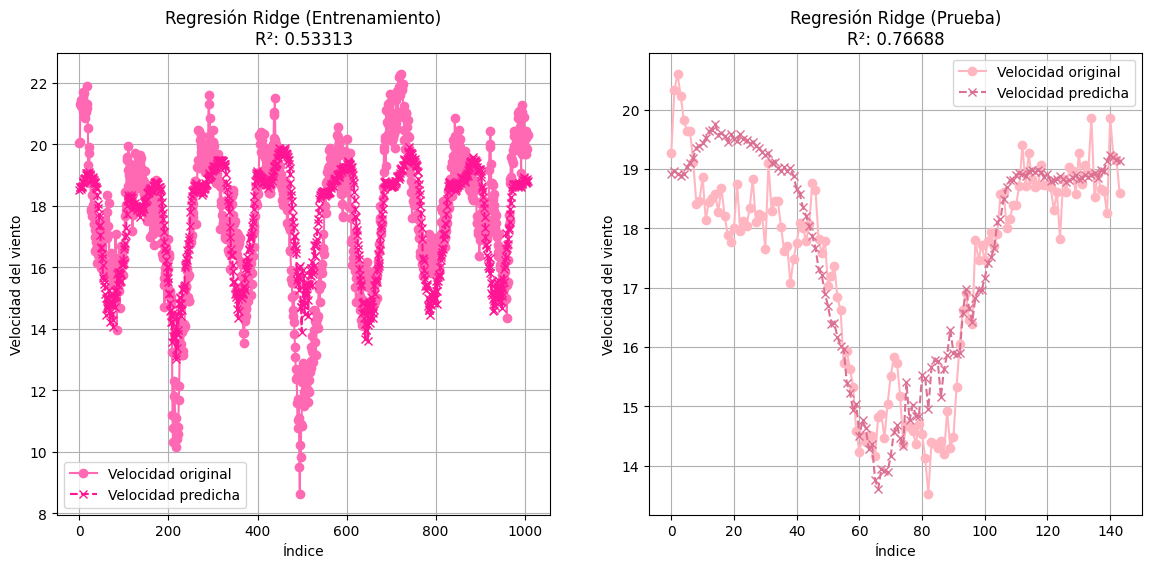

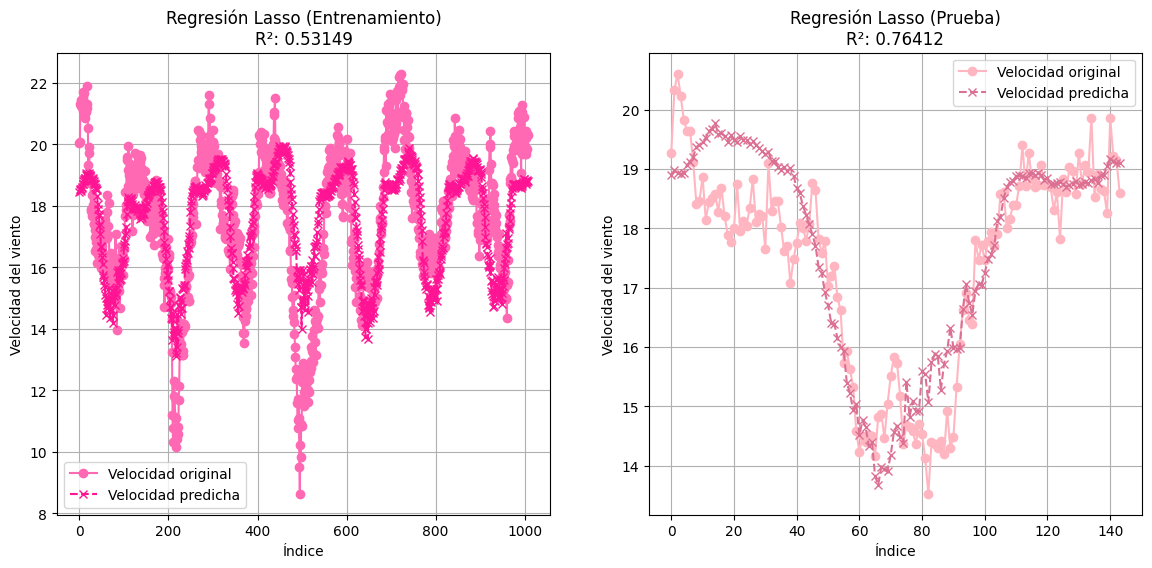

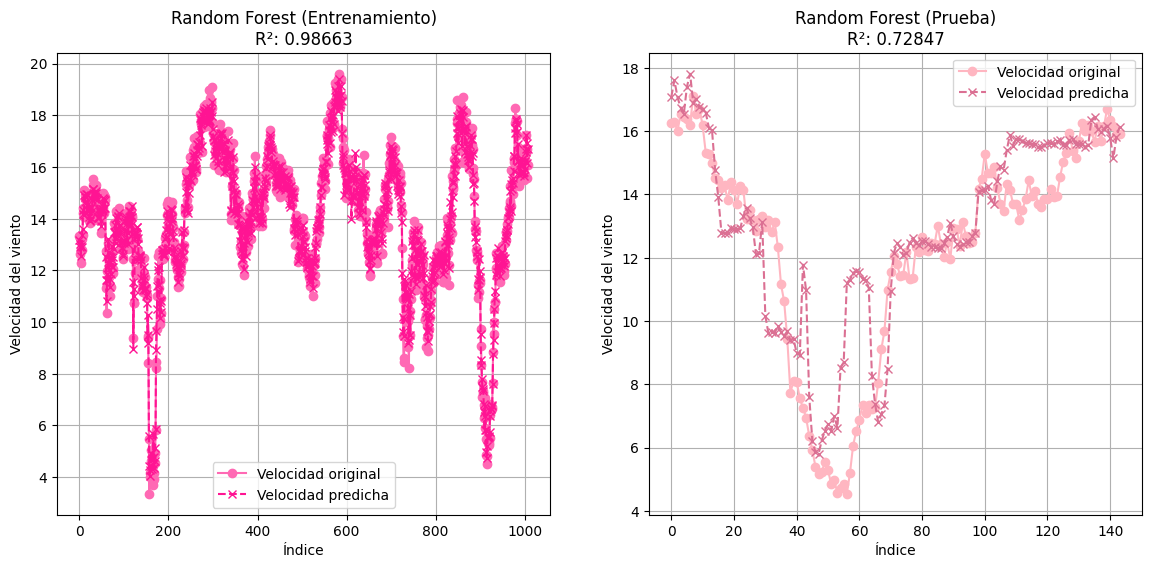

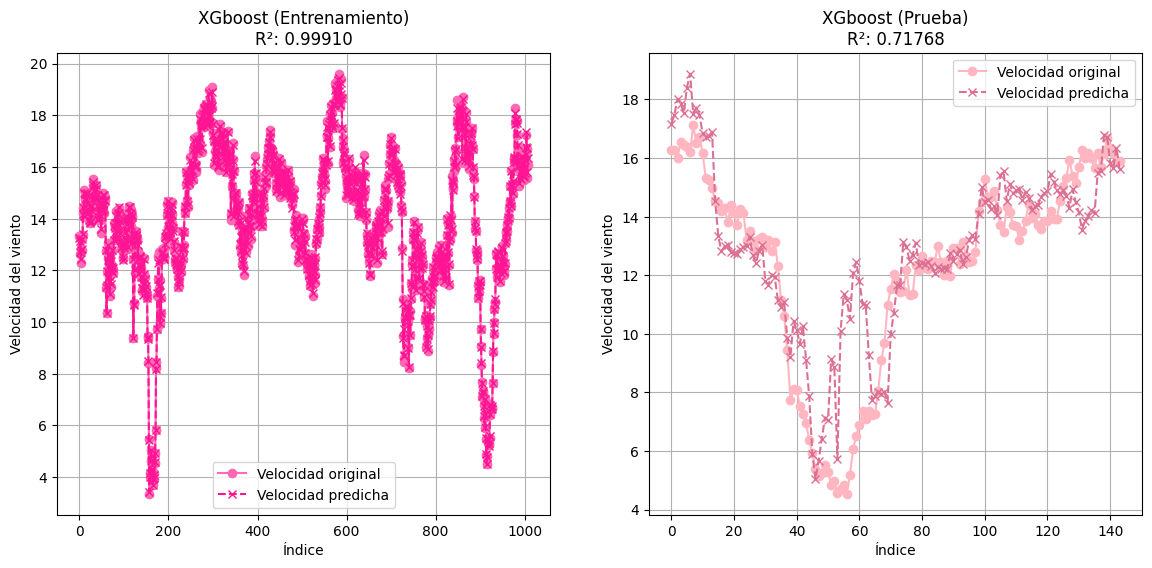

In [12]:
for i in range(6):
    plt = grafica(mejores[i][0], mejores[i][1], mejores[i][2], mejores[i][3], mejores[i][4])
    plt.show()

## **Modelo 2: Wind speed 100 metros (Sensor 2)**

### **Modelos usando ventanas de predicción**


In [13]:
X2 = data.drop(columns=['Fecha', 'VelViento100m_1', 'VelViento100m_2', 'VelViento80m_1', 'VelViento80m_2', 'VelViento60m', 'DirViento80m', 'DirViento60m'])
y2 = data['VelViento100m_2']


In [14]:
tabla, mejores = evaluar_modelos(X2, y2)
tabla

Modelo       MAPE      RMSE       R^2  Ljung-Box p-value  \
52     Random Forest  13.948897  1.743095  0.742372       5.265379e-65   
48    Regresión K-NN  17.236783  2.132634  0.614360       1.303018e-91   
39   Regresión Lasso   4.015628  0.837644  0.766706       3.595775e-67   
37  Regresión Lineal   3.996092  0.830596  0.770615       1.214976e-63   
38   Regresión Ridge   3.996013  0.832460  0.769584       7.349954e-65   
53           XGboost  14.675502  1.750468  0.740189       2.246286e-64   

    Jarque-Bera p-value  
52         4.671781e-10  
48         2.569998e-21  
39         1.734285e-01  
37         1.987139e-01  
38         1.915789e-01  
53         6.108926e-08

### **Gráficas de los modelos**

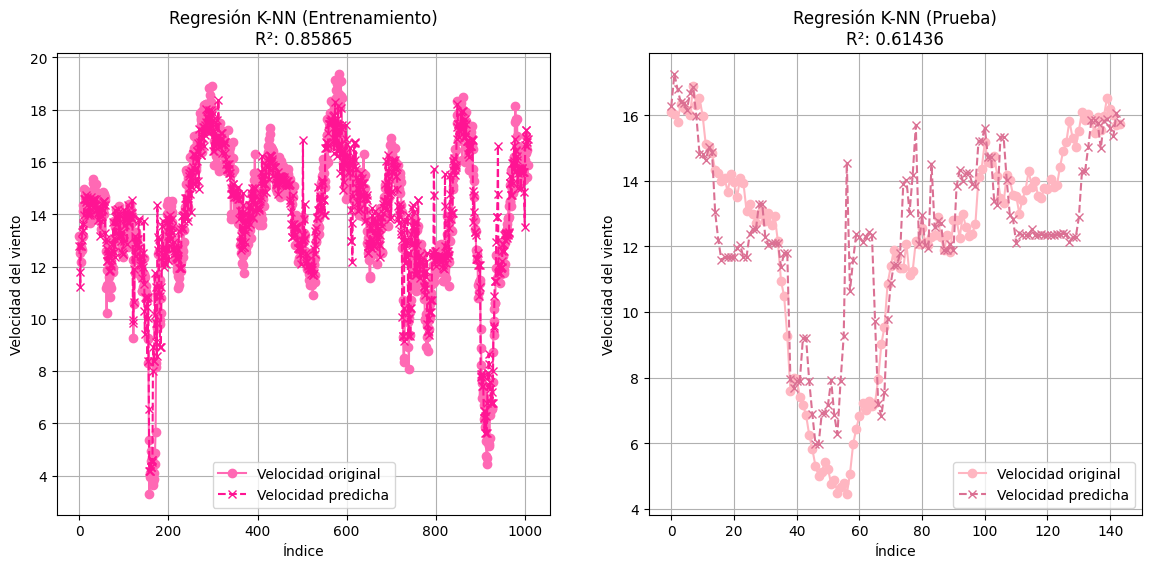

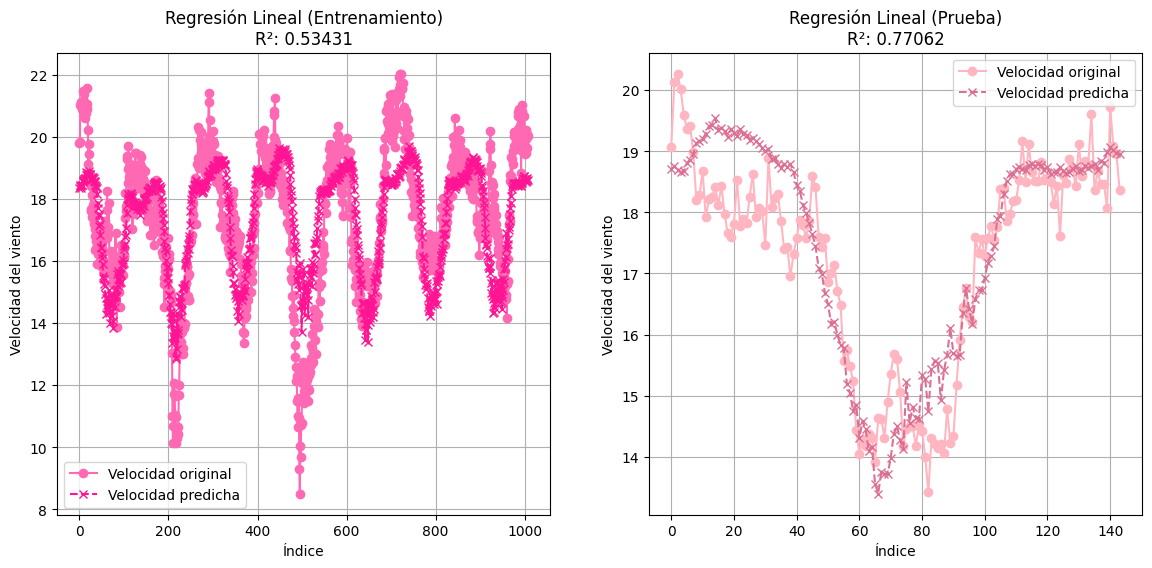

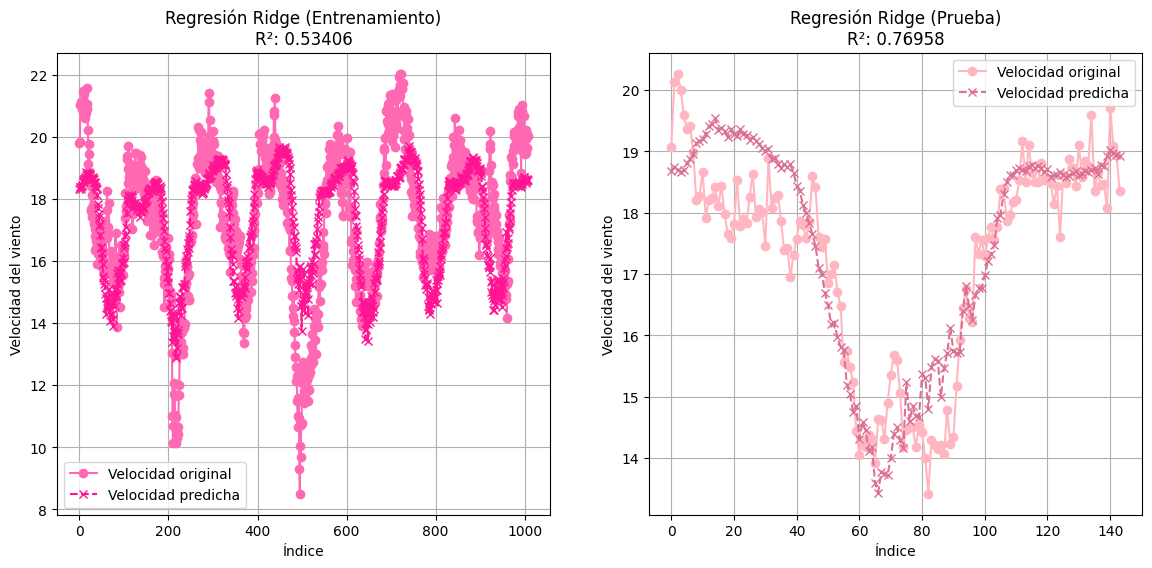

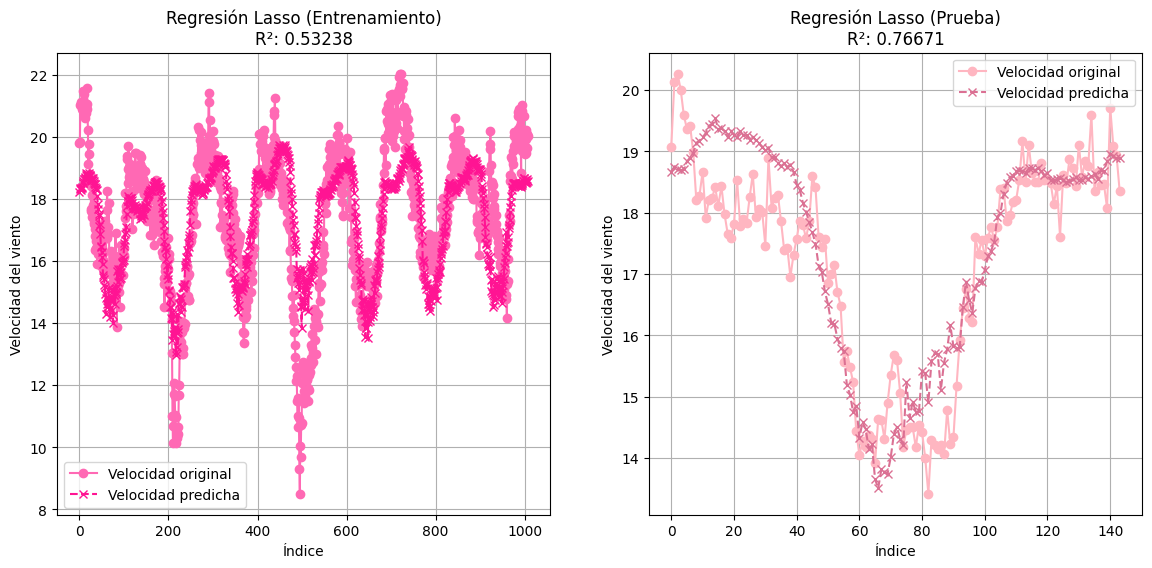

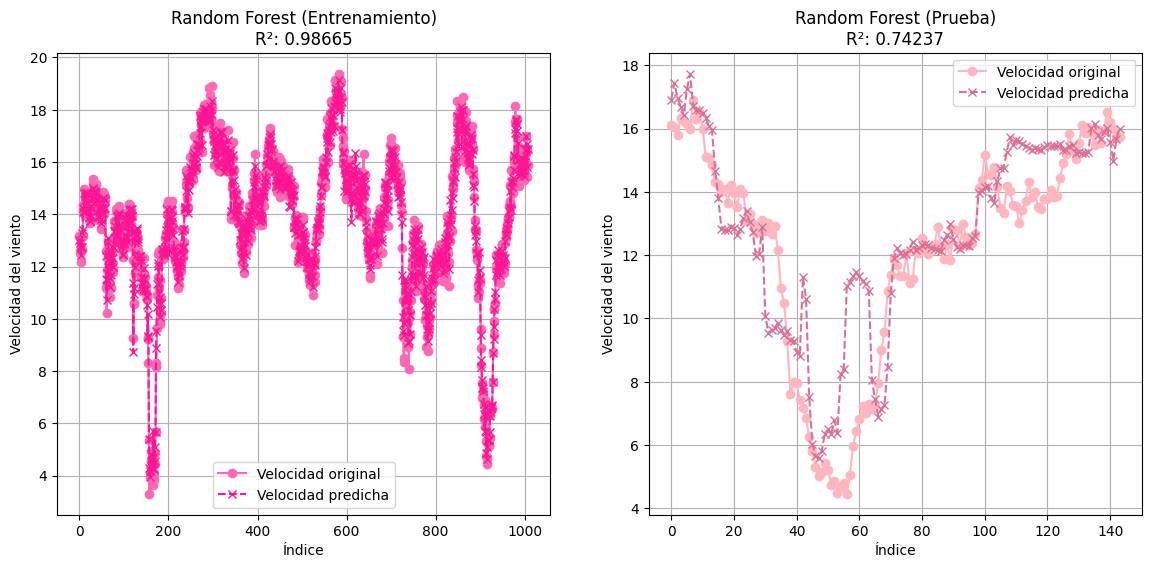

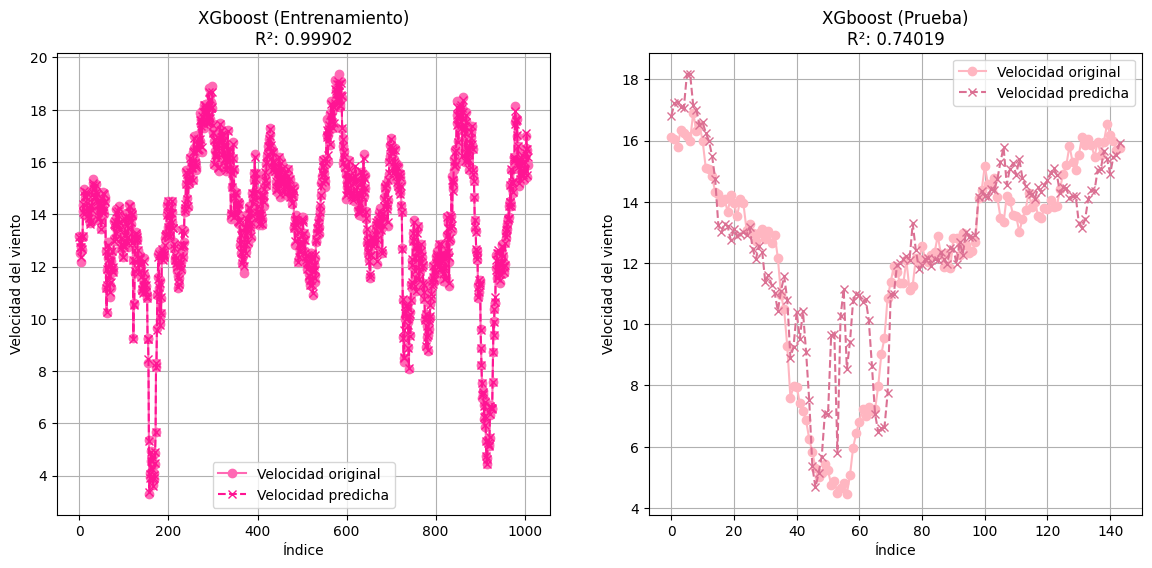

In [15]:
for i in range(6):
    plt = grafica(mejores[i][0], mejores[i][1], mejores[i][2], mejores[i][3], mejores[i][4])
    plt.show()

## **Modelo 3: Wind speed 80 metros (Sensor 1)**

In [ ]:
X3 = data.drop(columns=['Fecha', 'VelViento100m_1', 'VelViento100m_2', 'VelViento80m_1', 'VelViento80m_2', 'VelViento60m', 'DirViento100m', 'DirViento60m'])
y3 = data['VelViento80m_1']

### **Modelos usando ventanas de predicción**

In [ ]:
tabla, mejores = evaluar_modelos(X3, y3)
tabla

Modelo      MAPE      RMSE       R^2  Ljung-Box p-value  \
194     Random Forest  6.214552  1.099491  0.033025       1.392043e-58   
42     Regresión K-NN  6.751773  1.363591  0.369181       1.042822e-32   
45    Regresión Lasso  4.232337  0.872895  0.741500       5.655773e-63   
43   Regresión Lineal  4.219102  0.864644  0.746364       9.800919e-60   
44    Regresión Ridge  4.214576  0.866600  0.745215       8.855226e-61   
46      Tree Decision  7.219316  1.496871  0.239839       7.911801e-36   
48            XGboost  6.541622  1.372894  0.360544       1.983742e-53   

     Jarque-Bera p-value  
194         9.073786e-01  
42          1.041046e-04  
45          2.699373e-01  
43          3.753386e-01  
44          3.396947e-01  
46          1.650671e-02  
48          7.028256e-08

### **Gráficas de los modelos**

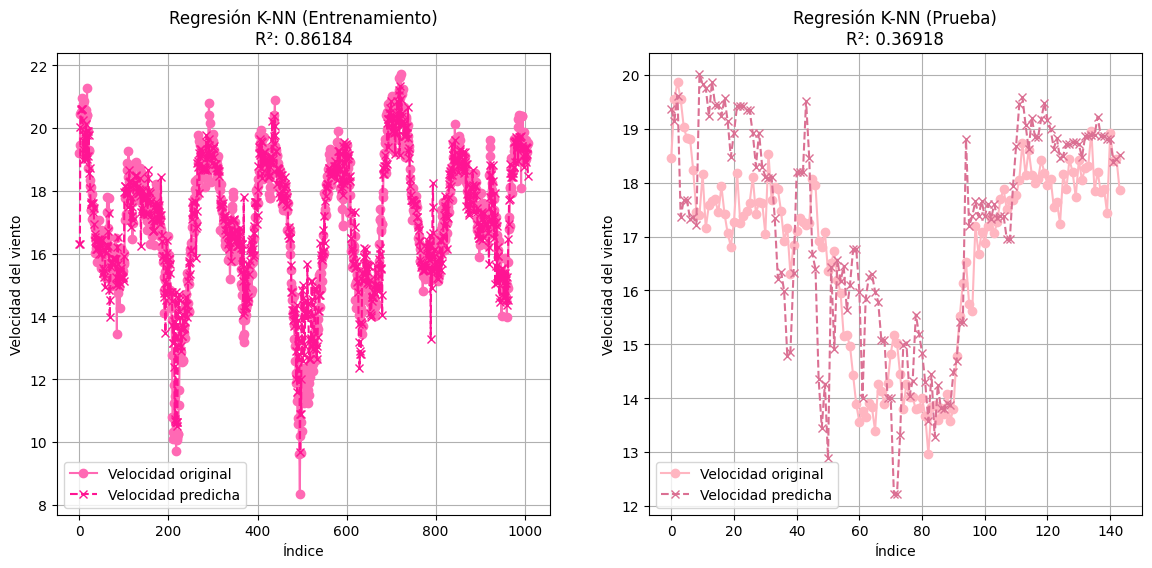

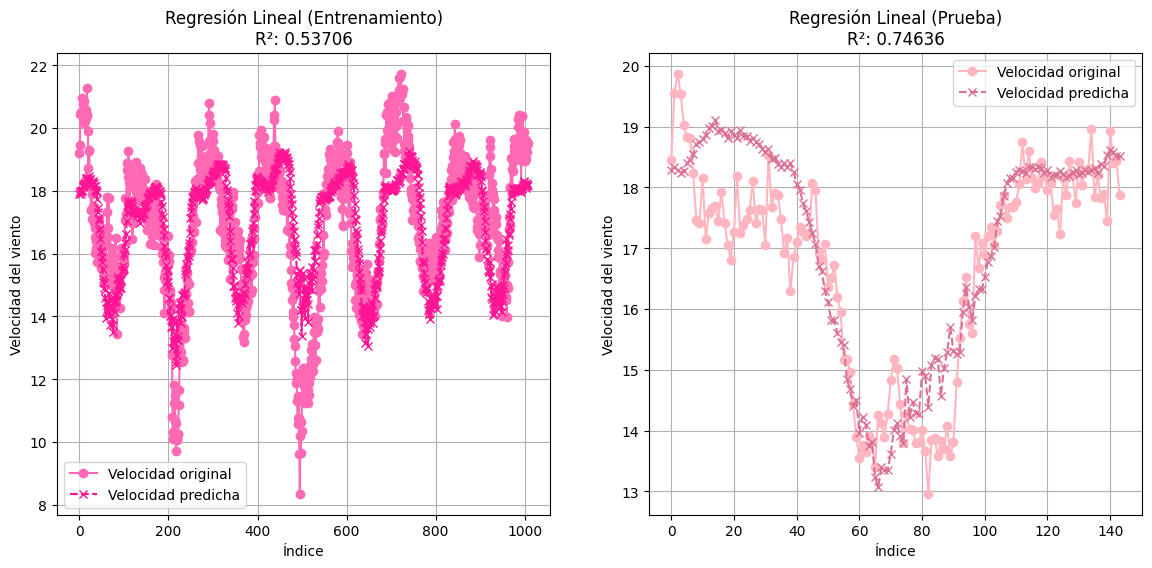

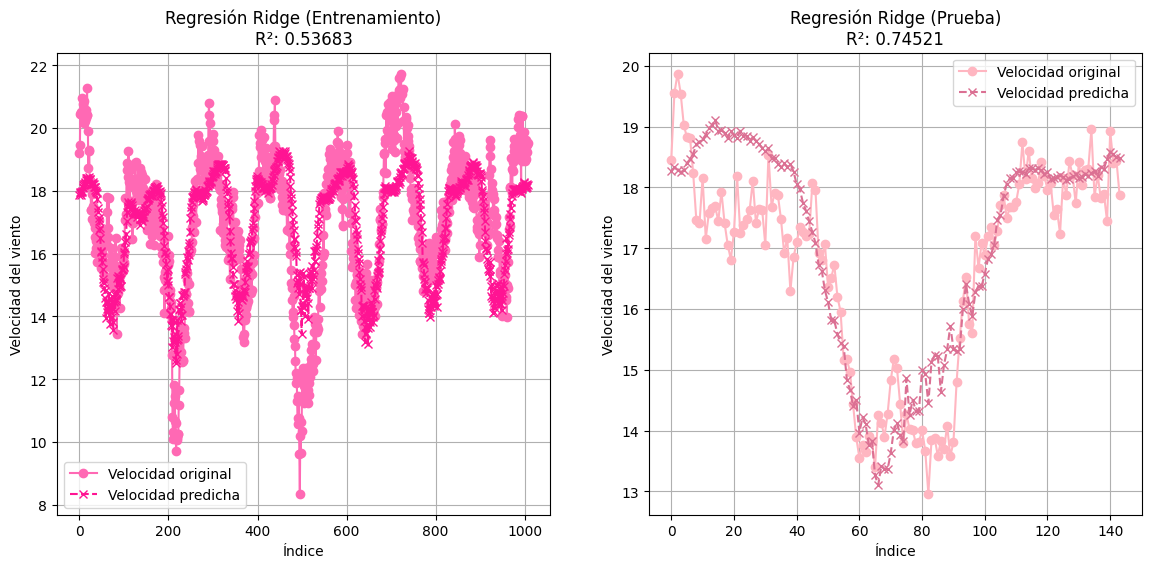

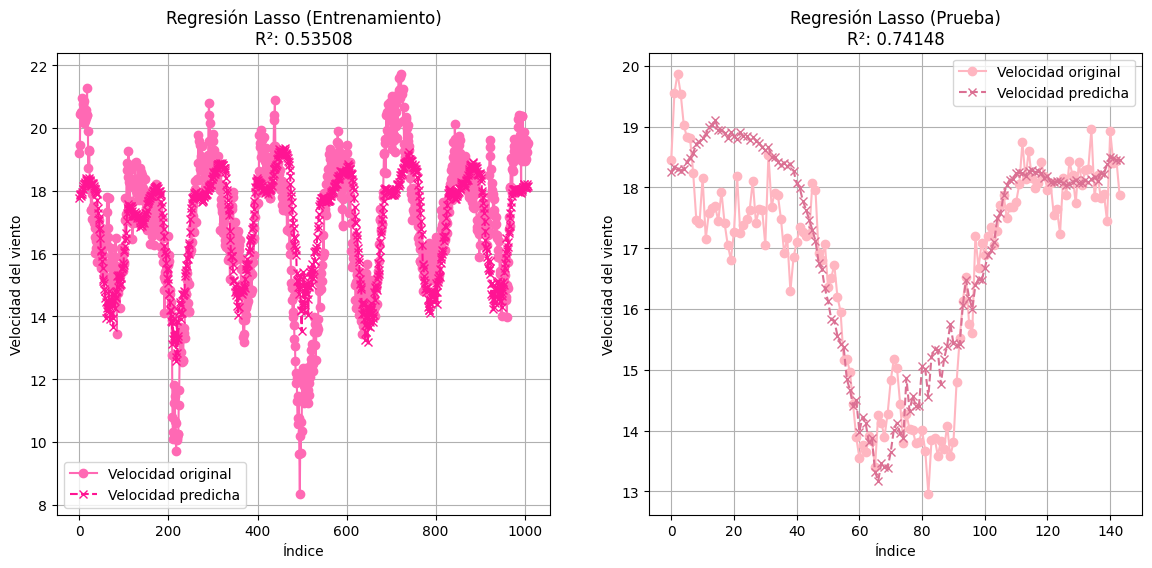

In [ ]:
for i in range(6):
    plt = grafica(mejores[i][0], mejores[i][1], mejores[i][2], mejores[i][3], mejores[i][4])
    plt.show()

## **Modelo 4: Wind speed 80 metros (Sensor 2)**

In [19]:
X4 = data.drop(columns=['Fecha', 'VelViento100m_1', 'VelViento100m_2', 'VelViento80m_1', 'VelViento80m_2', 'VelViento60m', 'DirViento100m', 'DirViento60m'])
y4 = data['VelViento80m_2']

### **Modelos usando ventanas de predicción**

In [20]:
tabla, mejores = evaluar_modelos(X4, y4)
tabla

Modelo       MAPE      RMSE       R^2  Ljung-Box p-value  \
52     Random Forest  15.810715  1.841094  0.688398       1.086024e-84   
48    Regresión K-NN  18.426858  2.188725  0.559617       8.866552e-94   
39   Regresión Lasso   4.206182  0.865905  0.744455       4.384785e-63   
37  Regresión Lineal   4.203377  0.857570  0.749351       7.246420e-60   
38   Regresión Ridge   4.196624  0.859552  0.748190       6.662610e-61   
53           XGboost  15.513360  1.862407  0.681142       3.387343e-69   

    Jarque-Bera p-value  
52         7.586783e-07  
48         2.568404e-10  
39         2.530800e-01  
37         3.441812e-01  
38         3.141458e-01  
53         7.055606e-09

### **Gráficas de los modelos**

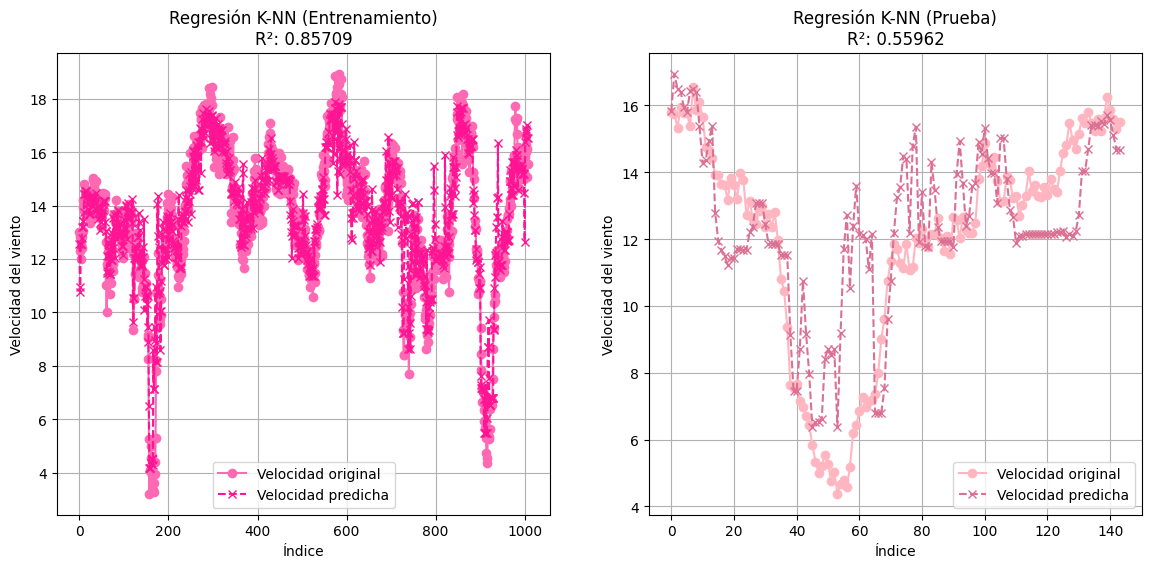

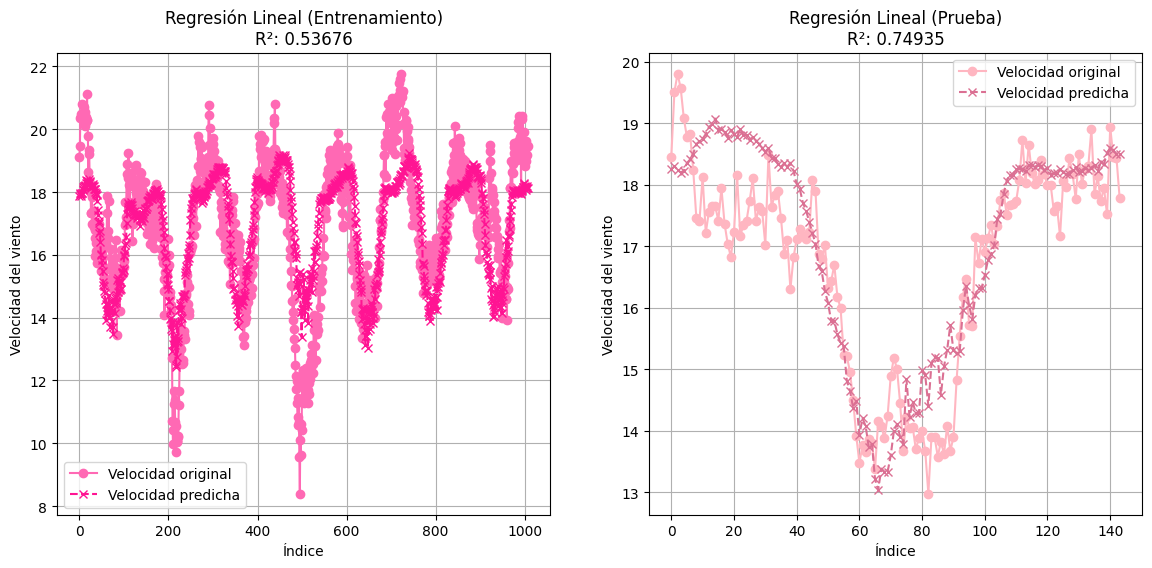

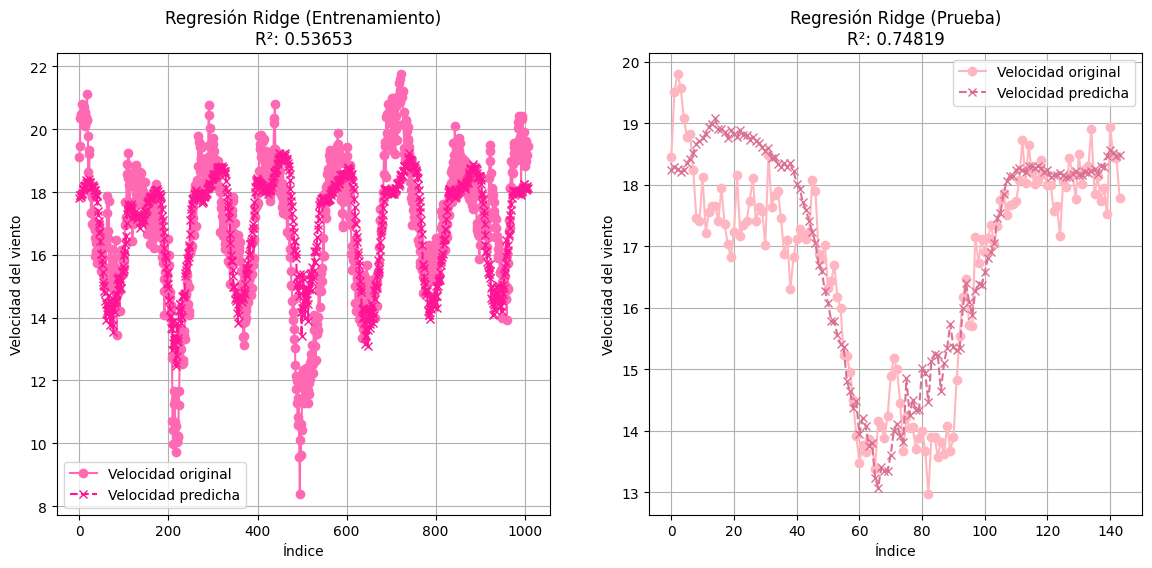

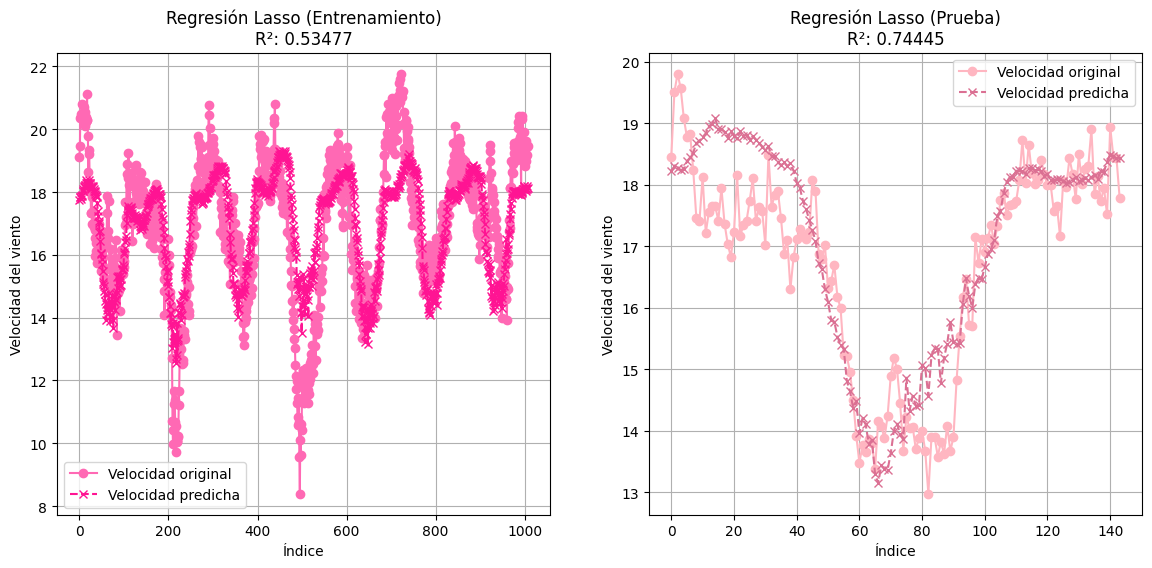

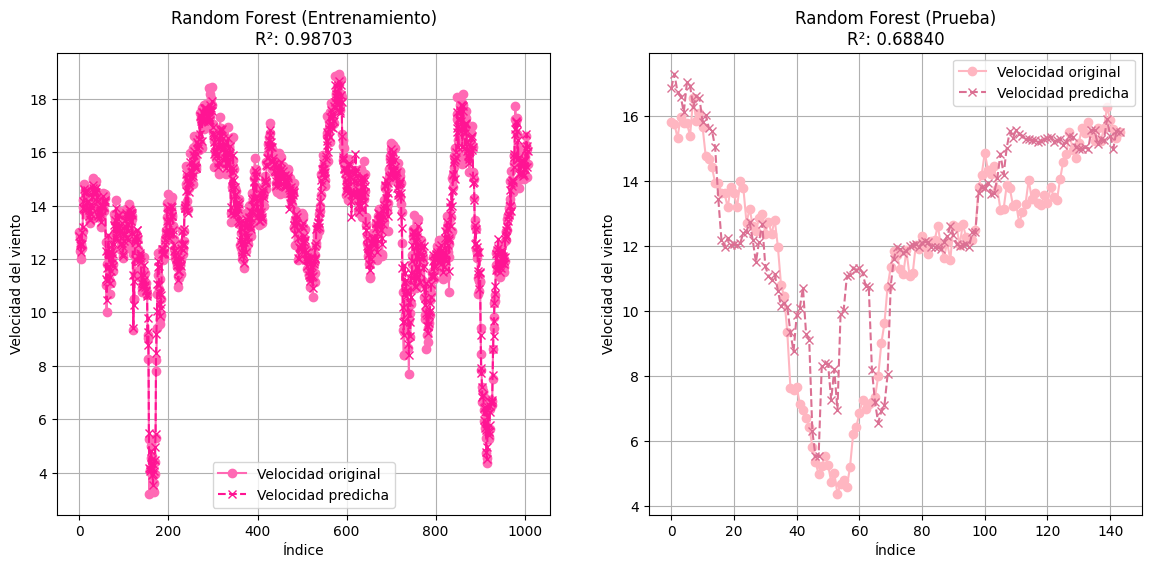

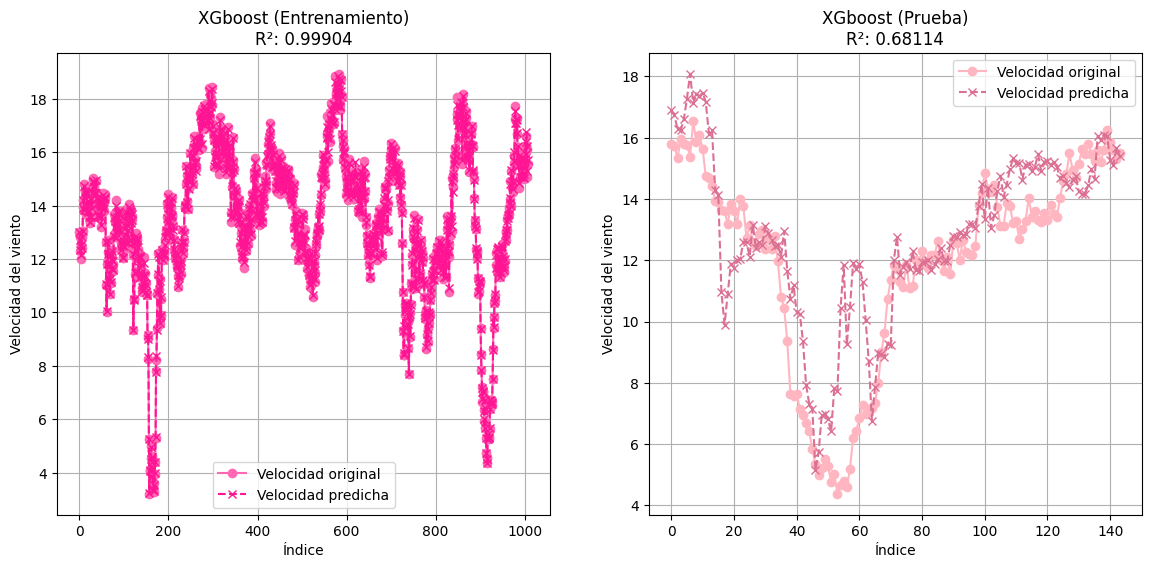

In [21]:
for i in range(6):
    plt = grafica(mejores[i][0], mejores[i][1], mejores[i][2], mejores[i][3], mejores[i][4])
    plt.show()

## **Modelo 5: Wind speed 60 metros**

In [16]:
X5 = data.drop(columns=['Fecha', 'VelViento100m_1', 'VelViento100m_2', 'VelViento80m_1', 'VelViento80m_2', 'VelViento60m', 'DirViento80m', 'DirViento100m'])
y5 = data['VelViento60m']


### **Modelos usando ventanas de predicción**

In [17]:
tabla, mejores = evaluar_modelos(X5, y5)
tabla

Modelo       MAPE      RMSE       R^2  Ljung-Box p-value  \
52     Random Forest  16.545232  1.908646  0.633686       1.875899e-79   
48    Regresión K-NN  19.725898  2.268929  0.482339       8.588551e-94   
39   Regresión Lasso   4.445535  0.890562  0.709324       8.948713e-59   
37  Regresión Lineal   4.439774  0.880800  0.715661       1.000130e-55   
38   Regresión Ridge   4.436869  0.882914  0.714294       1.275099e-56   
53           XGboost  14.825169  1.778782  0.681838       1.067667e-62   

    Jarque-Bera p-value  
52         3.684872e-07  
48         3.717309e-15  
39         3.340703e-01  
37         4.692246e-01  
38         4.269807e-01  
53         2.030054e-10

### **Gráfica de los modelos**

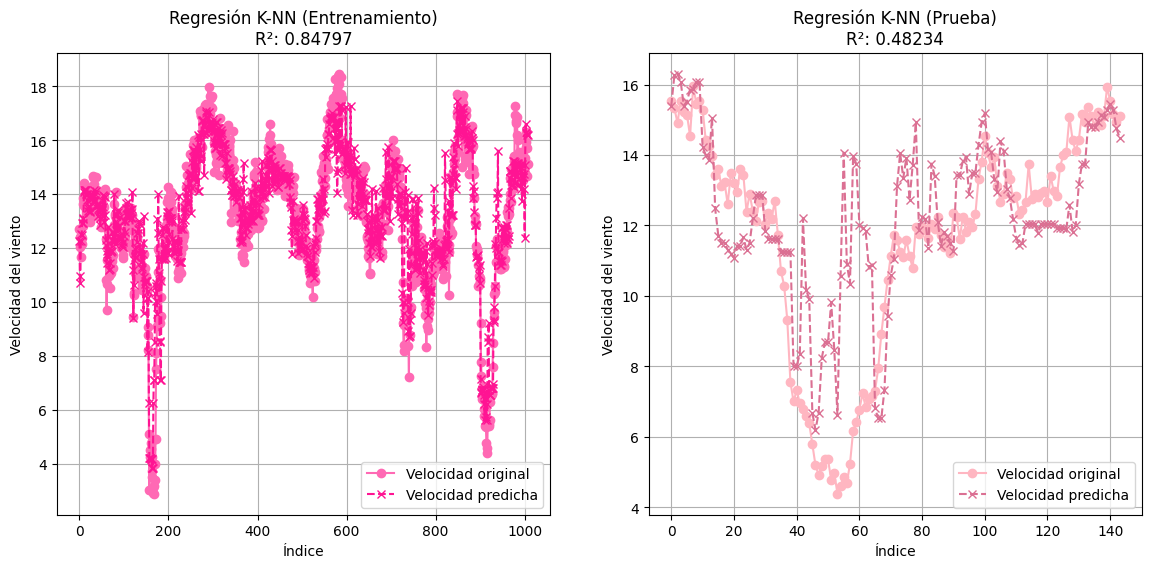

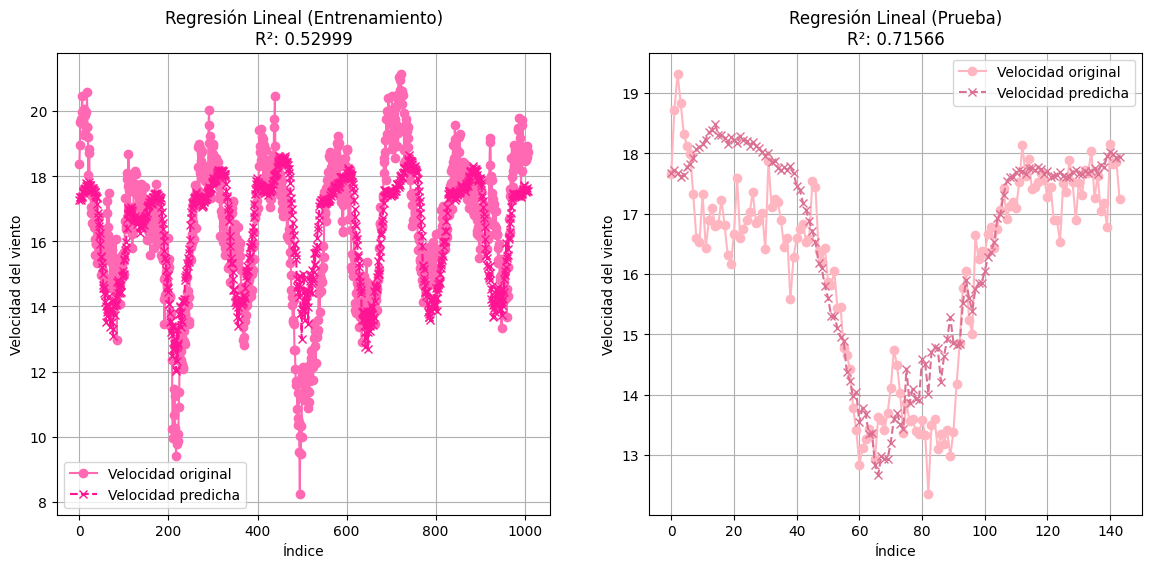

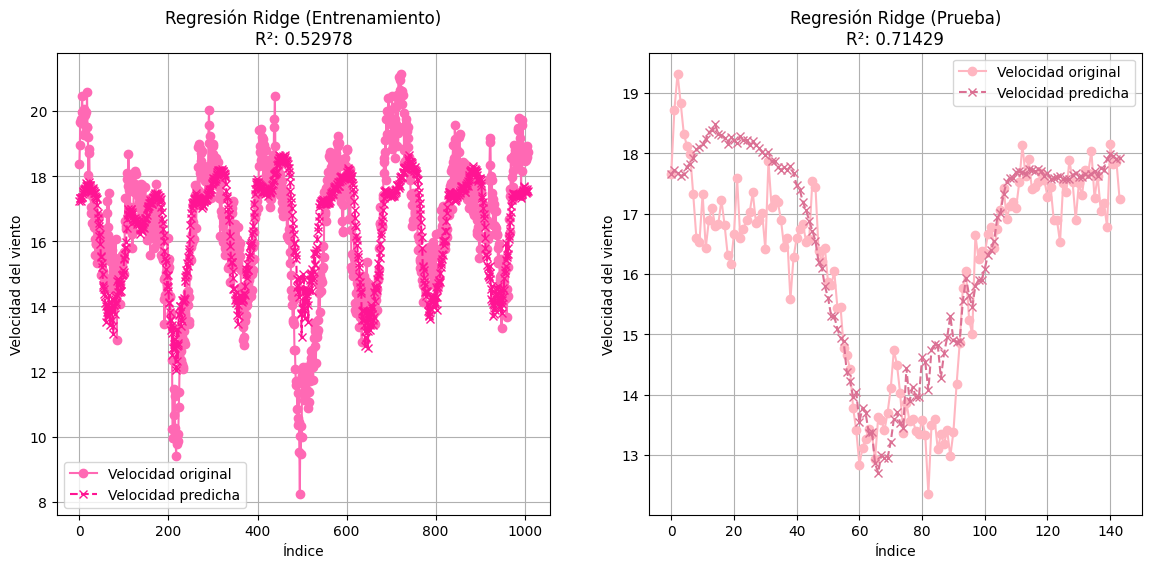

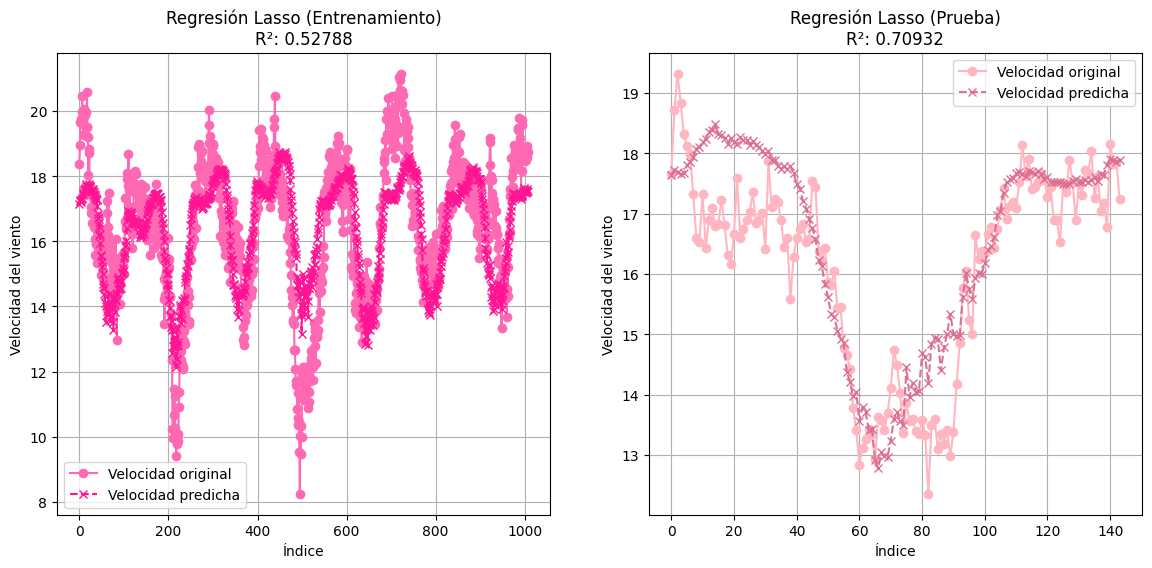

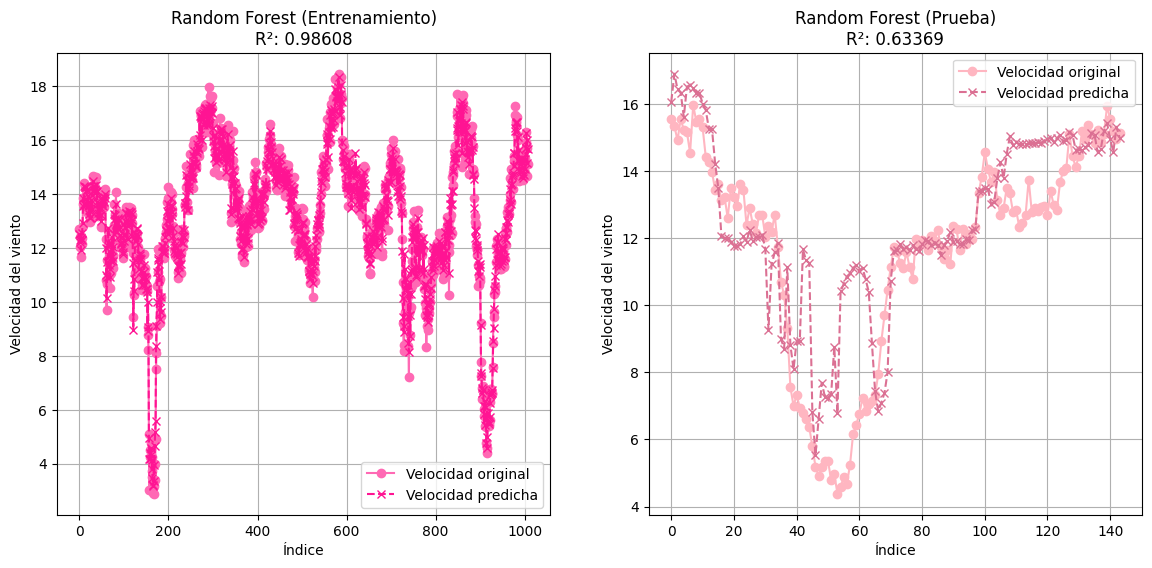

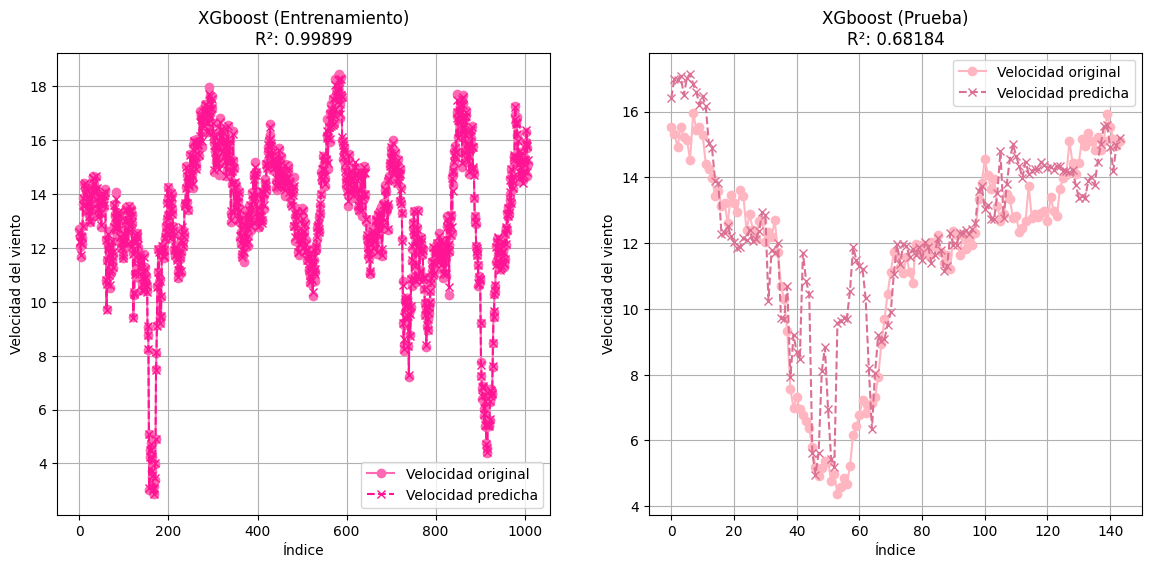

In [18]:
for i in range(6):
    plt = grafica(mejores[i][0], mejores[i][1], mejores[i][2], mejores[i][3], mejores[i][4])
    plt.show()

## **Conclusión**

Los modelos lineales (Regresión Lineal, Ridge y Lasso) demuestran ser los más apropiados para predecir la velocidad del viento en los diferentes sensores y alturas. Logran un equilibrio entre un ajuste adecuado en los datos de entrenamiento y una buena capacidad de generalización en los datos de prueba. Por otro lado, K-NN, a pesar de su alto rendimiento en entrenamiento, no es adecuado para esta tarea debido a su tendencia a sobreajustarse y su baja capacidad de generalización. Para futuros análisis, esperamos utilizar modelos específicos para series de tiempo y así ver mejor el comportamiento de nuestro conjunto de datos. 